# <img style="float: left; padding-right: 0.7cm; width: 3.0cm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/179px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

----

Tarea 2: Por Larry Uribe - 01-10-2021

 <h1><center>Tarea 2: Extracción de Datos desde la Web </center></h1>
    
## Instrucciones Generales.

- Fecha de entrega: 1 de octubre de 2021, 23:59.

- Vía de entrega: GitHub

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del Foro del curso en Canvas.


## Objetivos de Aprendizaje

Esta Tarea tiene como objetivo poner en práctica los contenidos del curso vistos hasta ahora, en especial:
- Manejo de librerías `pandas`,`matplotlib`, `requests` y `BeautifulSoup`.
- Manejo de datos estructurado y semi-estructurados.
- Análisis y comprensión de los elementos fundamentales de APIs y códigos HTML de páginas web. 
- Extracción de datos de la via API y scrapping sencillo.

---------

In [1]:
#Importando librerías
import pandas as pd
from bs4 import BeautifulSoup as bs
from datetime import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
import requests as r
import zipfile, io
from io import BytesIO as IO


Larry dice: 
**Se importan las librerías beautifulsoup, matplotlib, geopandas, request y pandas. y otras adicionales para manejos de archivos y fechas**

## 1. Reporte de indicadores económicos de Chile.

La API **MindicadorChile** es un servicio open source (web service) que entrega los principales indicadores económicos para Chile en formato JSON. Tanto los indicadores diarios como históricos para que desarrolladores puedan utilizarlos en sus aplicaciones o sitios web.

La aplicación mapea constantemente el sitio del Banco Central de Chile manteniendo así nuestra base de datos actualizada con los últimos valores del día. Toda la documentación de la API está disponible en la dirección https://mindicador.cl/.

En este ejercicio, ud. deberá utilizar la API para compilar datos para un análisis de la evolución de la economía chilena en los años 2019, 2020 y 2021, de manera de evaluar el impacto del estallido social y la pandemia.

**Revise cuisadosamente la página y documentación de la API**, y luego desarrolle los siguientes problemas:

**1.1.** Use la API para obtener los valores de siguientes indicadores entre el 1 de enero de 2019, y el 30 de septiembre de 2021: Dólar observado, tasa de desempleo, libra de cobre, índice de precios al consumidor.

**1.2.** Para cada indicador, genere un único DataFrame que contenga las siguientes columnas: `fecha, valor`. El DataFrame debe incluir todos los reportes disponibles para dicho indicador en el rango de fechas indicado, y las fechas deben estar en orden cronológico. Para ello, le pueden ser de utilidad las siguientes funciones de `pandas`: `pd.to_datetime()`,`DataFrame.sort_values()`. 

**1.3.** Genere una figura con cuatro paneles o subplots. En cada uno de ellos, grafique la serie de tiempo de los indicadores analizados, siguiendo las reglas básicas de formato de gráficos (ejes, títulos, etiquetas, etc.). A continuación se muestra un ejemplo de la figura a generar:<br>


<div>
<img src="figures/fig_1.png" width="500"/>
</div>

**Respuesta 1.1**

Larry dice:

**Se utilizó la documentacion de la API mindicador.cl y se utilizó el contenido de la clase Mindicador y metodo InfoAPI sugerida para obtener los parametros e indicadores de datos convenientemente mediante una función Mindicador()** a continuación está el código en Python para extraer además la informacion dolar, tasa de desempleo, valor libra de cobre e IPC de años 2019, 2020 y 2021.


In [2]:
#se utiliza la documentación de la API mindicador.cl 
#se crea la clase propuesta por ellos para obtener datos desde JSON con parametro año

import json
import requests
 
def Mindicador(indicador,ano):
    url = f'https://mindicador.cl/api/{indicador}/{ano}'
    response = requests.get(url)
    return response
    
#extrae dolar utilizando la clase anterior con el parametro "dolar" y año: 2019,2020 y 2021 respectivamente
dolar_2019 = Mindicador("dolar",2019)
dolar_2020 = Mindicador("dolar",2020)
dolar_2021 = Mindicador("dolar",2021)

#extrae dolar utilizando la clase anterior con el parametro "tasa_desempleo" y año: 2019,2020 y 2021 respectivamente
tasa_desempleo_2019 = Mindicador("tasa_desempleo",2019)
tasa_desempleo_2020 = Mindicador("tasa_desempleo",2020)
tasa_desempleo_2021 = Mindicador("tasa_desempleo",2021)

#extrae dolar utilizando la clase anterior con el parametro "libra_cobre" y año: 2019,2020 y 2021 respectivamente
libra_cobre_2019 = Mindicador("libra_cobre",2019)
libra_cobre_2020 = Mindicador("libra_cobre",2020)
libra_cobre_2021 = Mindicador("libra_cobre",2021)

#extrae dolar utilizando la clase anterior con el parametro "libra_cobre" y año: 2019,2020 y 2021 respectivamente
ipc_2019 = Mindicador("ipc",2019)
ipc_2020 = Mindicador("ipc",2020)
ipc_2021 = Mindicador("ipc",2021)



**Respuesta 1.2**

Larry dice:

**Utilizando las variables anteriores, se procede a convertir a DataFrame de Pandas segun lo solicitado** a continuación está el código en Python para realizar dichas operaciones requeridas.

Se utiliza concat de pandas para unir los dataframes, luego se ordenan con la funcion sort_values() de pandas, las fechas corresponden al maximo 30 de septiembre, ya que no existen dato nuevo.

In [3]:
#extrae solo los datos contenidos en "serie" de cada indicador y año

data_dolar_2019 = dolar_2019.json()['serie']
data_dolar_2020 = dolar_2020.json()['serie']
data_dolar_2021 = dolar_2021.json()['serie']

data_tasa_desempleo_2019 = tasa_desempleo_2019.json()['serie'] 
data_tasa_desempleo_2020 = tasa_desempleo_2020.json()['serie']
data_tasa_desempleo_2021 = tasa_desempleo_2021.json()['serie']

data_libra_cobre_2019 = libra_cobre_2019.json()['serie']
data_libra_cobre_2020 = libra_cobre_2020.json()['serie']
data_libra_cobre_2021 = libra_cobre_2021.json()['serie']

data_ipc_2019 = ipc_2019.json()['serie']
data_ipc_2020 = ipc_2020.json()['serie']
data_ipc_2021 = ipc_2021.json()['serie']

#crea dataframes df_ respectivos

df_dolar_2019 = pd.json_normalize(data_dolar_2019)
df_dolar_2020 = pd.json_normalize(data_dolar_2020)
df_dolar_2021 = pd.json_normalize(data_dolar_2021)
df_tasa_desempleo_2019 = pd.json_normalize(data_tasa_desempleo_2019)
df_tasa_desempleo_2020 = pd.json_normalize(data_tasa_desempleo_2020)
df_tasa_desempleo_2021 = pd.json_normalize(data_tasa_desempleo_2021)
df_libra_cobre_2019 = pd.json_normalize(data_libra_cobre_2019)
df_libra_cobre_2020 = pd.json_normalize(data_libra_cobre_2020)
df_libra_cobre_2021 = pd.json_normalize(data_libra_cobre_2021)
df_ipc_2019 = pd.json_normalize(data_ipc_2019)
df_ipc_2020 = pd.json_normalize(data_ipc_2020)
df_ipc_2021 = pd.json_normalize(data_ipc_2021)

#crea dolar con concat
df_dolar = pd.concat([df_dolar_2019, df_dolar_2020,df_dolar_2021])
df_tasa_desempleo = pd.concat([df_tasa_desempleo_2019, df_tasa_desempleo_2020,df_tasa_desempleo_2021])
df_libra_cobre = pd.concat([df_libra_cobre_2019, df_libra_cobre_2020,df_libra_cobre_2021])
df_ipc  = pd.concat([df_ipc_2019, df_ipc_2020,df_ipc_2021])

#ordena por fecha
#df_dolar['fecha'] = pd.to_datetime(df_dolar['fecha'])  
#df_tasa_desempleo['fecha'] = pd.to_datetime(df_tasa_desempleo['fecha'])  
#df_libra_cobre['fecha'] = pd.to_datetime(df_libra_cobre['fecha'])  
#df_ipc['fecha'] = pd.to_datetime(df_ipc['fecha'])  

df_dolar = df_dolar.sort_values('fecha').reset_index().drop('index', axis=1)
df_tasa_desempleo = df_tasa_desempleo.sort_values('fecha').reset_index().drop('index', axis=1)
df_libra_cobre = df_libra_cobre.sort_values('fecha').reset_index().drop('index', axis=1)
df_ipc = df_ipc.sort_values('fecha').reset_index().drop('index', axis=1)

#agrega filtro por fecha:
#citando desde: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
#pendiente



Respuesta 1.3
Se crean los 4 subgraficos contenidos en uno solo, con 4 cuadrantes similares al ejemplo solicitado por la profesora.


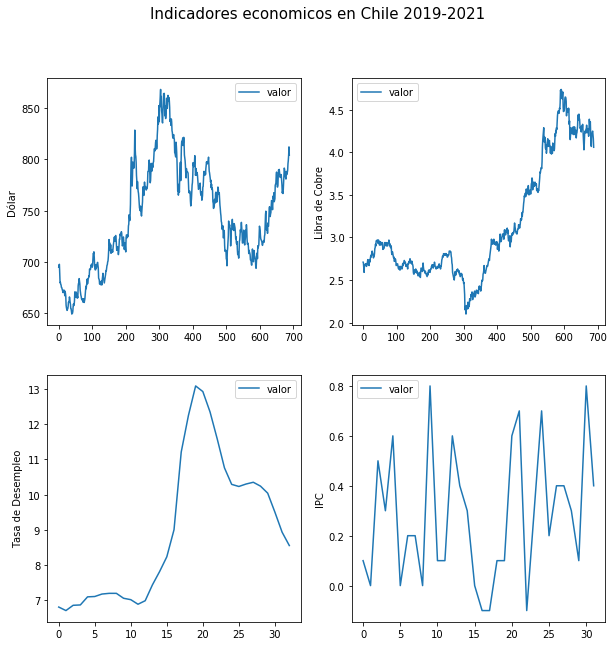

In [4]:
#Graficando los pandas dataframes totalizados

figura, ejes = plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Indicadores economicos en Chile 2019-2021', fontsize=15)
ejes[0, 0].set_ylabel("Dólar")
ejes[0, 1].set_ylabel("Libra de Cobre")
ejes[1, 0].set_ylabel("Tasa de Desempleo")
ejes[1, 1].set_ylabel("IPC")
df_dolar.plot(ax=ejes[0,0])
df_libra_cobre.plot(ax=ejes[0,1])
df_tasa_desempleo.plot(ax=ejes[1,0])
df_ipc.plot(ax=ejes[1,1])
plt.savefig('Grafico_Ejercicio1.jpg')
plt.show()

## 2. Terremotos alrededor del mundo (USGS)

El Servicio Geológico de los Estados Unidos o USGS por sus siglas en inglés (United States Geological Survey), es una agencia científica del gobierno federal de los Estados Unidos, dedicada al estudio del medio ambiente y ecosistemas, recursos naturales, amenazas del cambio climático y peligros naturales que pueden afectar a las personas. 

El USGS es una institución líder a nivel mundial en sismología, y a través del programa *Earthquake Hazards* (https://earthquake.usgs.gov/) se ocupa de monitorear y reportar eventos sísmicos, evaluar la amenaza e impacto de terremotos, e investigar sobre sus causas y efectos. Dentro de sus múltiples herramientas y plataformas de información, cuenta con una API que entrega información en tiempo real de los sismos registrados alrededor del mundo:

https://earthquake.usgs.gov/fdsnws/event/1/?ref=springboard

En este ejericio, ud. extraerá data del USGS para analizar y visualizar la ocurrencia de terremotos de gran magnitud alrededor del mundo en las últimas dos décadas.

**2.1.** Usando la API del USGS, obtenga el listado de sismos de **magnitud mayor a 7** ocurridos en todo el mundo, desde el 1 de enero de 2000 a la fecha. Puede elegir el formato de respuesta de su preferencia. Consdiere que el formato GeoJSON es similar a JSON, sólo que en uno de sus campos incluye información de coordenadas geográficas.

**2.2.** Convierta los datos extraídos en un DataFrame con la siguiente estructura:

<div>
<img src="figures/fig_2.png" width="600"/>
</div>

**2.3.** Utilizando los datos de latitud y longitud de cada terremoto, convierta su DataFrame en un GeoDataFrame con geometrías tipo 'POINT'.

**2.4.** Descargue un conjunto de datos vectorial con la geometría (polígonos) de los continentes y países del mundo. Por ejemplo, puede encontrar estos datos en el portal del Banco Mundial:

https://datacatalog.worldbank.org/dataset/world-bank-official-boundaries

Elija cualquiera de los datasets disponibles (siempre que le sirva para generar un mapa del mundo), e implemente su **descarga y lectura directamente desde su código de Python**.  

**2.5.** Utilizando los datos de sismos y la capa vectorial descargada, genere un mapa del mundo que incluya: polígonos de continentes y/o países del mundo, y la ubicación y magnitud de los sismos registrados en la base de datos del USGS. Grafique las magnitudes como escala de colores.

**Ejercicio 2.1 - Extrae de la URL la informacion considerando en su dirección incluye parametros "starttime" y "endtime" en la ruta con los valores solicitados desde 2000-01-01 a la fecha actual retornada en variable automatica, considerando formato yyyy-mm-dd** considera magnitud minima 7 en parametro minmagnitud puesto directo en la URL


In [5]:
#obtiene la fecha actual en formato yyyy-mm-dd

fecha_actual = datetime.today().strftime('%Y-%m-%d')
#print(fecha_actual)

#URL en su dirección incluye parametros start time y endtine de 2000-01-01 al 2021-09-30 (yyyy-mm-dd)
url = f'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2000-01-01&endtime={fecha_actual}&minmagnitude=7'
datos = requests.get(url)

Ejercicio 2.2 - Limpia la informacion obtenida en formato JSON para construir los dataframes requeridos

In [6]:
# Limpiamos los JSON obtenidos

terremotos = datos.json()['features']
data_aux = pd.DataFrame(terremotos)
terremotos = data_aux
df_id = pd.DataFrame(data_aux['id']) # extrae el id
#df_id
ubicacion = pd.json_normalize(terremotos['properties'])
df_ubicacion = ubicacion['place'] #extrae lugar 
#ubicacion
magnitud = pd.json_normalize(terremotos['properties'])
df_magnitud = magnitud['mag'] #extrae magnitud 
#magnitud
geo = pd.json_normalize(terremotos['geometry'])
df_geo = geo['coordinates'] #extrae coordenada
#geo

latitud = pd.json_normalize(terremotos['geometry'])
latitud['geometry.coordinates'] = latitud['coordinates']
df_latitud = latitud.drop(['type', 'coordinates'], axis=1)

df_latitud

punto_df = df_latitud['geometry.coordinates'].apply(pd.Series).drop([2], axis=1 )
punto_df['lon'] = punto_df[0]
punto_df['lat'] = punto_df[1]
punto_df = punto_df[['lon','lat']]
punto_df
df_datos = pd.concat([df_id, df_ubicacion, df_magnitud, df_latitud, punto_df], axis=1)

#se juntan los datos verticalmente ya que son del mismo orden del dataset original terremotos

df_datos 



,id,place,mag,geometry.coordinates,lon,lat
0,us7000f93v,"Acapulco, Mexico",7.0,"[-99.7429, 16.9722, 20]",-99.7429,16.9722
1,us6000f9sq,South Sandwich Islands region,7.1,"[-24.8743, -60.2845, 6]",-24.8743,-60.2845
2,us6000f65h,"Nippes, Haiti",7.2,"[-73.4822, 18.4335, 10]",-73.4822,18.4335
3,us6000f53e,South Sandwich Islands region,8.1,"[-25.327, -58.4513, 55.73]",-25.3270,-58.4513
4,us6000f4ly,South Sandwich Islands region,7.5,"[-25.0316, -57.5674, 47.23]",-25.0316,-57.5674
...,...,...,...,...,...,...
322,usp0009sbh,"89 km E of Luwuk, Indonesia",7.6,"[123.573, -1.105, 26]",123.5730,-1.1050
323,usp0009rrc,"22 km NW of Añatuya, Argentina",7.0,"[-62.99, -28.307, 608.5]",-62.9900,-28.3070
324,usp0009qb4,"Volcano Islands, Japan region",7.6,"[143.73, 22.338, 126.5]",143.7300,22.3380
325,usp0009nxg,Vanuatu region,7.1,"[173.818, -19.528, 33]",173.8180,-19.5280


Ejercicio 2.3, se construye geodataframe incluyendo dato geometria point

In [7]:
gdf = gpd.GeoDataFrame(df_datos, geometry=gpd.points_from_xy(df_datos.lon, df_datos.lat))
gdf

#se cita el sitio de donde se obtuvo el uso de metogo points_from_xy() 
#https://geopandas.org/gallery/create_geopandas_from_pandas.html


,id,place,mag,geometry.coordinates,lon,lat,geometry
0,us7000f93v,"Acapulco, Mexico",7.0,"[-99.7429, 16.9722, 20]",-99.7429,16.9722,POINT (-99.74290 16.97220)
1,us6000f9sq,South Sandwich Islands region,7.1,"[-24.8743, -60.2845, 6]",-24.8743,-60.2845,POINT (-24.87430 -60.28450)
2,us6000f65h,"Nippes, Haiti",7.2,"[-73.4822, 18.4335, 10]",-73.4822,18.4335,POINT (-73.48220 18.43350)
3,us6000f53e,South Sandwich Islands region,8.1,"[-25.327, -58.4513, 55.73]",-25.3270,-58.4513,POINT (-25.32700 -58.45130)
4,us6000f4ly,South Sandwich Islands region,7.5,"[-25.0316, -57.5674, 47.23]",-25.0316,-57.5674,POINT (-25.03160 -57.56740)
...,...,...,...,...,...,...,...
322,usp0009sbh,"89 km E of Luwuk, Indonesia",7.6,"[123.573, -1.105, 26]",123.5730,-1.1050,POINT (123.57300 -1.10500)
323,usp0009rrc,"22 km NW of Añatuya, Argentina",7.0,"[-62.99, -28.307, 608.5]",-62.9900,-28.3070,POINT (-62.99000 -28.30700)
324,usp0009qb4,"Volcano Islands, Japan region",7.6,"[143.73, 22.338, 126.5]",143.7300,22.3380,POINT (143.73000 22.33800)
325,usp0009nxg,Vanuatu region,7.1,"[173.818, -19.528, 33]",173.8180,-19.5280,POINT (173.81800 -19.52800)


Ejercicio 2.4 descarga archivos desde el sitio, y luego descomprime en directorio local para cargar luego las capas

In [8]:
#Descargar datos de la URL de origen
url_banco ='https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046667/wb_boundaries_geojson_lowres.zip'

data_bin = r.get(url_banco, stream=True)
# print(r.url)

#Extra el archivo del comprimido ZIP
z = zipfile.ZipFile(io.BytesIO(data_bin.content))
z.extractall()

Ejercicio 2.5 grafico con las capas y puntos que representan las magnitudes segun lo solicitado.
se dejo a proposito un tamaño del punto de 50 (markersize)

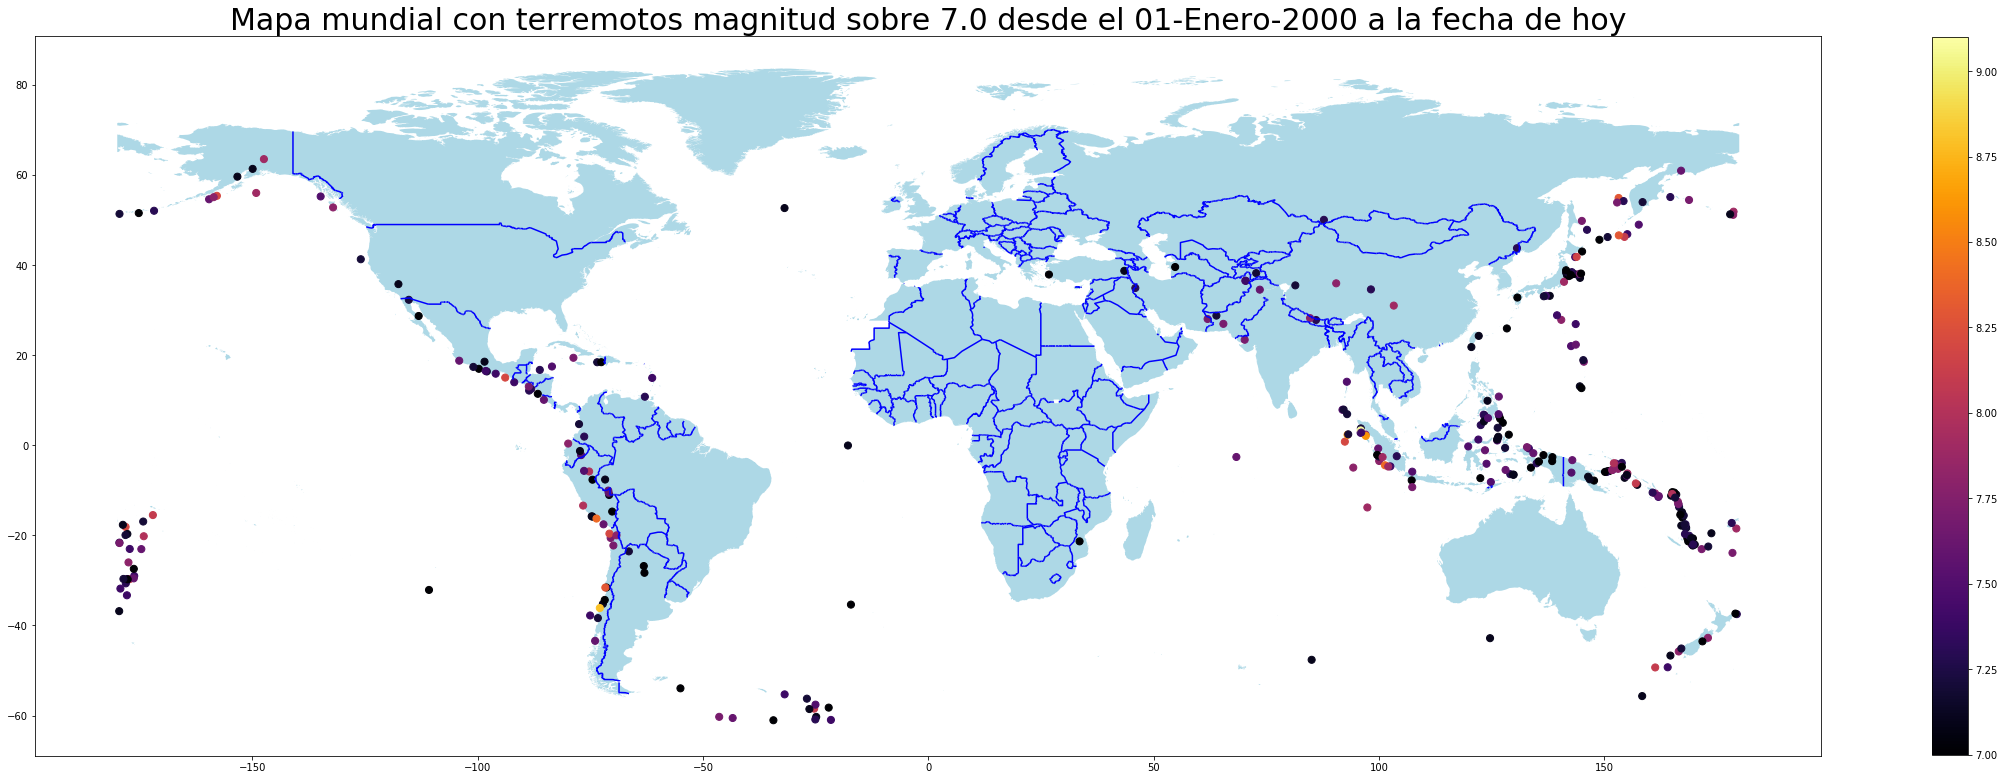

In [9]:
fig, ax = plt.subplots(figsize = (40,40))
bordes = gpd.read_file('WB_Boundaries_GeoJSON_lowres/WB_countries_Admin0_lowres.geojson')
bordes2 = gpd.read_file('WB_Boundaries_GeoJSON_lowres/WB_Adm0_boundary_lines_10m_lowres.geojson')

bordes.plot(ax=ax, color='lightblue' )
bordes2.plot(ax=ax, color='blue')

gdf.plot(ax=ax, column='mag', marker='o', cmap='inferno', legend=True, legend_kwds={'shrink': 0.33}, markersize=50)
ax.set_title('Mapa mundial con terremotos magnitud sobre 7.0 desde el 01-Enero-2000 a la fecha de hoy',fontsize=30)
plt.savefig('terremotos.jpg')
plt.show()


## 3. Webscrapping

Suponga que ud. ha decidido crear un emprendimiento comercial vendiendo tablets, ya que actualmente que son un producto muy demandado para el teletrabajo. Para ello, necesita hacer un estudio de mercado y analizar los precios de venta de la competencia.

En este ejercicio, ud. hará un scrapper de la página de la tienda PCFactory, específicamente del catálogo de tablets ubicado en la siguiente URL: https://www.pcfactory.cl/tablets?categoria=967&papa=636.

**3.1** Analice cuidadosamente el código HTML de la página y determine: ¿qué tag o atributo permite identificar el listado de productos con sus respectivas características (nombre, marca, precio)?

**3.2** Obtenga el código web de la página y extraiga la información de interés, de manera de llegar a un DataFrame con la siguiente estructura:

<div>
<img src="figures/fig_3.png" width="500"/>
</div>


Note que existen dos páginas de resultados, el objetivo es extraer los datos de ambas páginas.

3.1 Respuesta: Dada la inspeccion con el navegador de internet, se pudo revisar que en el contenido de la pagina web
    Se detecto los siguientes areas de interes con la informacion a extraer:
        
    PRECIO: Dentro de tag 'div' Atributo 'class' valor "title-md color-primary-1" en el primer elemento de tipo string
    ID: Dentro de tag 'p' Atributo 'class' valor  "link color-dark" en el primer elemento de tipo string
    MARCA: Dentro de tag 'div' Atributo 'itemprop'  valor "name" en el primer elemento de tipo string
    NOMBRE: Dentro de tag 'div' Atributo 'itemprop' valor "name" en el segundo elemento de tipo string
    

3.2 Respuesta: se procedió a generar dos lecturas de la pagina 1 y pagina 2, con el parametro cookie que debe ser obtenido del navegador para evitar que de error de many redirects reportado, luego se procede a extraer la informacion con beautifulsoup segun los parametros examinados y detectados en el punto anterior 3.1.
finalmente se procedio a limpiar la marca, precio, y id para obtener el resultado conforme el dataframe solicitado por la profesora

In [10]:

#Dado que son 2 paginas, se procede a hacer la lectura de la primera y luego de la segunda 

##PAGINA 1

url = f"https://www.pcfactory.cl/tablets?categoria=967&papa=636&pagina=1"

cookie = {'Cookie': 'PHPSESSID=3up1kqrvvpdcst86ngr5610ji5; _gcl_au=1.1.405190773.1632863739; _ga=GA1.2.1041027111.1632863739; _fbp=fb.1.1632863738997.311959761; _gid=GA1.2.184711240.1633124695; cto_bundle=TEoIR195YTJHYiUyQlZNVExwV1czNE9EUktFeXptRGwxeFRHOUdVaDBhQ1luRng1SiUyQkl0TkZLZFYlMkJRYmtINWpPcFBsU3BaQTRlUXBZc01mR2VLS3EyUW4ya3p2VGxlVW16Z2lvcmZXZzdSZFhDS2Z3YTBUTUFaJTJGd21XMDNHJTJCVUNOM3FaT3lEcmJHdzJHeWwzb0xTdFRISVRPOHpnJTNEJTNE'}
    
# extrae la informacion como texto de la pagina web utilizando la cookie para evitar el problema del too many redirects

HTML = r.get(url, headers=cookie).text
contenido = bs(HTML) #utiliza beautifulsoup para extraer la informacion del texto HTML en datos más legibles


# de la inspeccion de dato navegando en la web, se puede concluir que la información de tablet está en div class product
lista_productos = contenido.find_all('div', attrs={'class': 'product'})

#genera listas donde almacena los valores encontrados

precio = []
identificador = [] 
marca = []
nombre = []

#por cada elemento de la lista se busca su respectivo precio, identificador, marca y nombre para agregar a la lista
for producto in lista_productos:
    
    precio.append(producto.find_all('div', attrs={'class': "title-md color-primary-1"})[0].text)
    
    identificador.append(producto.find_all('p', attrs={'class': "link color-dark"})[0].text)

    marca.append(producto.find_all('div', attrs={'itemprop': "name"})[0].text)
    
    nombre.append(producto.find_all('div', attrs={'itemprop': "name"})[1].text)


##PAGINA 2

url = f"https://www.pcfactory.cl/tablets?categoria=967&papa=636&pagina=2"

cookie = {'Cookie': 'PHPSESSID=3up1kqrvvpdcst86ngr5610ji5; _gcl_au=1.1.405190773.1632863739; _ga=GA1.2.1041027111.1632863739; _fbp=fb.1.1632863738997.311959761; _gid=GA1.2.184711240.1633124695; cto_bundle=TEoIR195YTJHYiUyQlZNVExwV1czNE9EUktFeXptRGwxeFRHOUdVaDBhQ1luRng1SiUyQkl0TkZLZFYlMkJRYmtINWpPcFBsU3BaQTRlUXBZc01mR2VLS3EyUW4ya3p2VGxlVW16Z2lvcmZXZzdSZFhDS2Z3YTBUTUFaJTJGd21XMDNHJTJCVUNOM3FaT3lEcmJHdzJHeWwzb0xTdFRISVRPOHpnJTNEJTNE'}
    
# extrae la informacion como texto de la pagina web utilizando la cookie para evitar el problema del too many redirects

HTML = r.get(url, headers=cookie).text
contenido = bs(HTML) #utiliza beautifulsoup para extraer la informacion del texto HTML en datos más legibles


# de la inspeccion de dato navegando en la web, se puede concluir que la información de tablet está en div class product
lista_productos = contenido.find_all('div', attrs={'class': 'product'})


#por cada elemento de la lista se busca su respectivo precio, identificador, marca y nombre para agregar a la lista
for producto in lista_productos:
    
    precio.append(producto.find_all('div', attrs={'class': "title-md color-primary-1"})[0].text)
    
    identificador.append(producto.find_all('p', attrs={'class': "link color-dark"})[0].text)

    marca.append(producto.find_all('div', attrs={'itemprop': "name"})[0].text)
    
    nombre.append(producto.find_all('div', attrs={'itemprop': "name"})[1].text)


    
#limpia el signo "$" de la lista de precio y remueve la palabra "ID" de la lista de identificador, luego convierte precio a numero
#los pesos no poseen decimales, por lo que basta con un INT
#El ID se deja en string por conveniencia, ya que pudiese en futuro existir un ID alfanumerico (no lo sabemos)
#se remueve la ® del nombre de marca

identificador2 = []

for i in identificador:
    identificador2.append(i[2:])

precio2 =[]
    
for i in precio:
    precio2.append(i[2:])
    
marca2 = []

for i in marca:
    marca2.append(i[:-4])

# genera el dataframe a partir de listas

data = pd.DataFrame(list(zip(nombre,identificador2,precio2,marca2)), columns = ['name','id','price','brand'])


#muestra el dataframe generado solicitado conforme la grafica de la profesora
data

,name,id,price,brand
0,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",42139,69.990,SoyMomo
1,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",42140,69.990,SoyMomo
2,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836,69.990,Lenovo
3,"Tablet Space Pro 10.1"" 2GB 32GB WiFi Quad Core...",37944,74.990,Gear
4,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917,74.990,Kindle
...,...,...,...,...
68,"iPad Pro de 12,9"" 128 GB chip M1 Wi‑Fi + Cellu...",41689,1.199.990,Apple
69,"iPad Pro de 12,9"" 256 GB chip M1 Wi‑Fi + Cellu...",41690,1.279.990,Apple
70,"iPad Pro 12,9"" Wi‑Fi 1TB Space Gray",38772,1.299.990,Apple
71,"iPad Pro de 12,9"" 1 TB chip M1 Wi‑Fi - Space G...",41692,1.689.990,Apple
